# Exercise 5
## Problem 1: Predicting CentralAir using SalePrice

In [31]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [32]:
# Import Datasheet
train = pd.read_csv('../data files/train.csv')
#train.info()

# Extract Sale_Price and CentralAir from dataframe
Sale_Price = pd.DataFrame(train['SalePrice'])
Central_Air = pd.DataFrame(train['CentralAir'])

#Set CentralAir as categorical type
Central_Air = Central_Air.astype('category')

#print(Sale_Price.info())
#print(CentralAir.info())

Y    1365
N      95
Name: CentralAir, dtype: int64


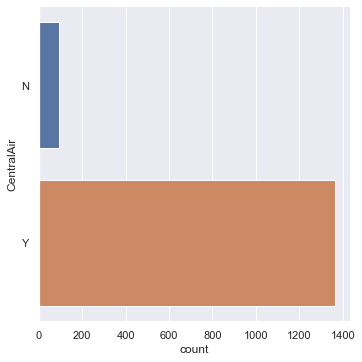

In [33]:
type(Central_Air["CentralAir"])
print(Central_Air["CentralAir"].value_counts())
# Count Plot for Central Air
sb.catplot(y = "CentralAir", data = Central_Air, kind = "count")

In [34]:
print('The ratio of Y:N\n',1365/95,': 1')

The ratio of Y:N
 14.368421052631579 : 1


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

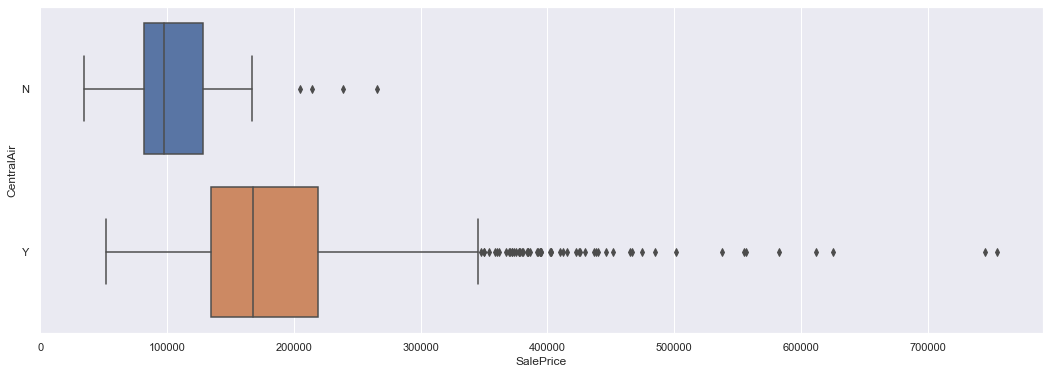

In [35]:
# Create a joint dataframe by concatenating SalePrice and CentralAir
SP_CA = pd.concat([Sale_Price, Central_Air], axis = 1).reindex(Sale_Price.index)

# Joint Boxplot of SalePrice against CentralAir
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = SP_CA, orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

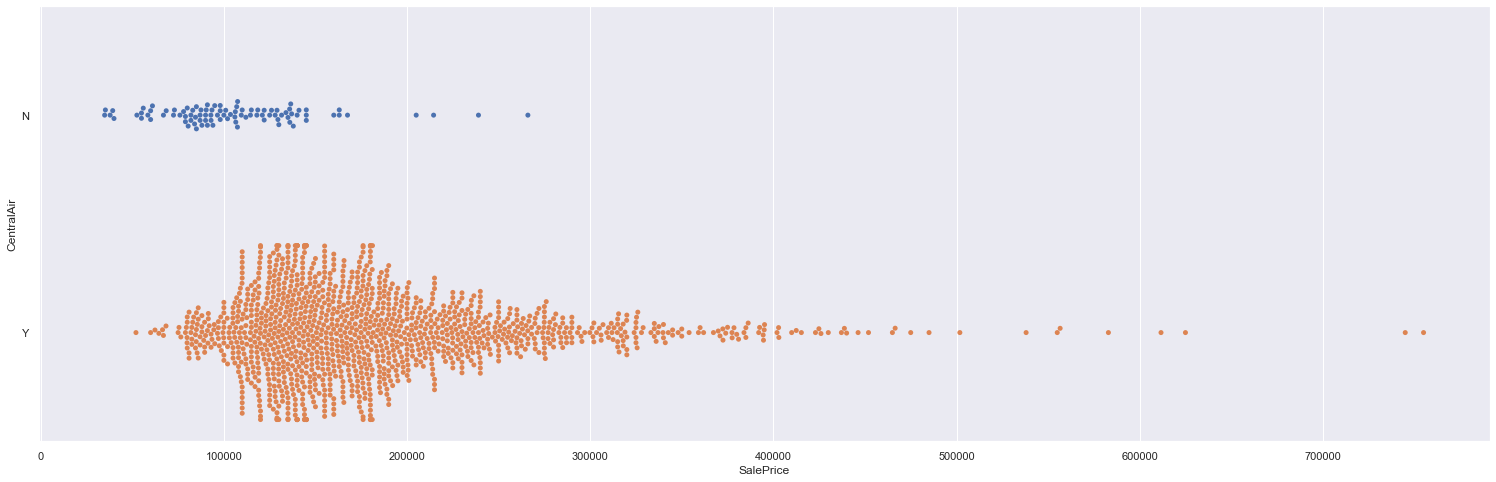

In [36]:
# Joint Swarmplot of SalePrice against CentralAir
f = plt.figure(figsize=(26, 8))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = SP_CA, orient = "h")

In [37]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Import other essential models and functions from sklearn
from sklearn.model_selection import train_test_split # For splitting into test and train sets
from sklearn.metrics import confusion_matrix # For plotting Confusion Matrix
from sklearn.tree import plot_tree # For plotting Decision Tree

In [38]:
# Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)
SP_train, SP_test, CA_train, CA_test = train_test_split(Sale_Price, Central_Air, test_size = 360)
print('SP_train: ',SP_train.shape,'\nSP_test: ',SP_test.shape,'\nCA_train: ',CA_train.shape,'\nCA_test',CA_test.shape)

SP_train:  (1100, 1) 
SP_test:  (360, 1) 
CA_train:  (1100, 1) 
CA_test (360, 1)


In [39]:
# Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(SP_train, CA_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

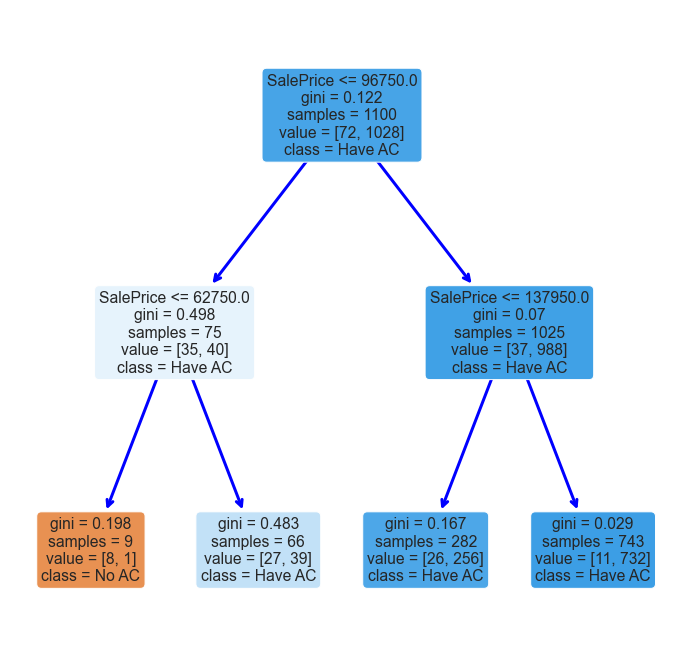

In [40]:
# Visualize the Decision Tree model using the plot_tree function
# f = plt.figure(figsize=(12,12))
# plot_tree(dectree, filled=True, rounded=True, 
#           feature_names=["SalePrice"], 
#           class_names=["No AC","Have AC"])

f = plt.figure(figsize=(12,12))
BB=plot_tree(dectree, filled=True, rounded=True, 
         feature_names=["SalePrice"], 
         class_names=["No AC","Have AC"])
for i in BB:
   A=i.arrow_patch
   if A is not None:
       A.set_linewidth(3)
       A.set_edgecolor("blue")

<AxesSubplot:>

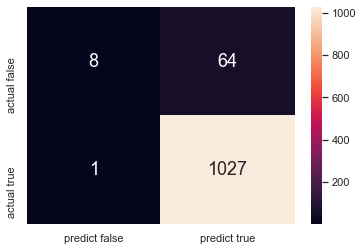

In [41]:
# Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
CA_train_pred = dectree.predict(SP_train)

# Creating x and y labels
x_axis_labels = ['predict false','predict true'] # labels for x-axis
y_axis_labels = ['actual false','actual true'] # labels for y-axis

# Plotting the Two-Way Confusion Matrix
# sb.heatmap(confusion_matrix(CA_train, CA_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) # w/o x-y label
sb.heatmap(confusion_matrix(CA_train, CA_train_pred), xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot = True, fmt=".0f", annot_kws={"size": 18})

In [42]:
# Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
# True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

C = confusion_matrix(CA_train, CA_train_pred)
# C = [TN,FP
#     FN,TP]

# Print Classification Accuracy
print("Classification Accuracy \t:", dectree.score(SP_train, CA_train))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))

Classification Accuracy 	: 0.9409090909090909
True Positive Rate (tpr) 	: 0.9990272373540856
True Negative Rate (tnr) 	: 0.1111111111111111
False Positive Rate (fpr) 	: 0.8888888888888888
False Negative Rate (fnr) 	: 0.0009727626459143969


<AxesSubplot:>

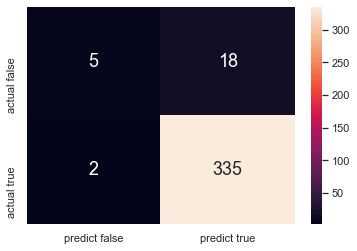

In [43]:
# Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
CA_test_pred = dectree.predict(SP_test)

# Plotting the Two-Way Confusion Matrix
sb.heatmap(confusion_matrix(CA_test, CA_test_pred),xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot = True, fmt=".0f", annot_kws={"size": 18})

In [44]:
# Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
# True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data

C = confusion_matrix(CA_test, CA_test_pred)
# C = [TN,FP
#     FN,TP]

# Print Classification Accuracy
print("Classification Accuracy \t:", dectree.score(SP_test, CA_test))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))

Classification Accuracy 	: 0.9444444444444444
True Positive Rate (tpr) 	: 0.9940652818991098
True Negative Rate (tnr) 	: 0.21739130434782608
False Positive Rate (fpr) 	: 0.782608695652174
False Negative Rate (fnr) 	: 0.005934718100890208


# Problem 2 : Predicting CentralAir using Other Variables
Perform all the above steps on “CentralAir” against each of the variables “GrLivArea”, “OverallQual”, “YearBuilt”, oneby-one to perform individual Binary Classifications and obtain individual univariate Decision Tree Models in each case.
Consider all predictor variables “GrLivArea”, “OverallQual”, “YearBuilt” as Numeric in case of this classification problem.

In [45]:
# Retrieving GrLivArea, OverallQual and YearBuilt
GrLivArea = pd.DataFrame(train['GrLivArea'])
OverallQual = pd.DataFrame(train['OverallQual'])
YearBuilt = pd.DataFrame(train['YearBuilt'])
# GrLivArea.info()
# OverallQual.info()
# YearBuilt.info()

### Analysing CentralAir against **GrLivArea**

<AxesSubplot:>

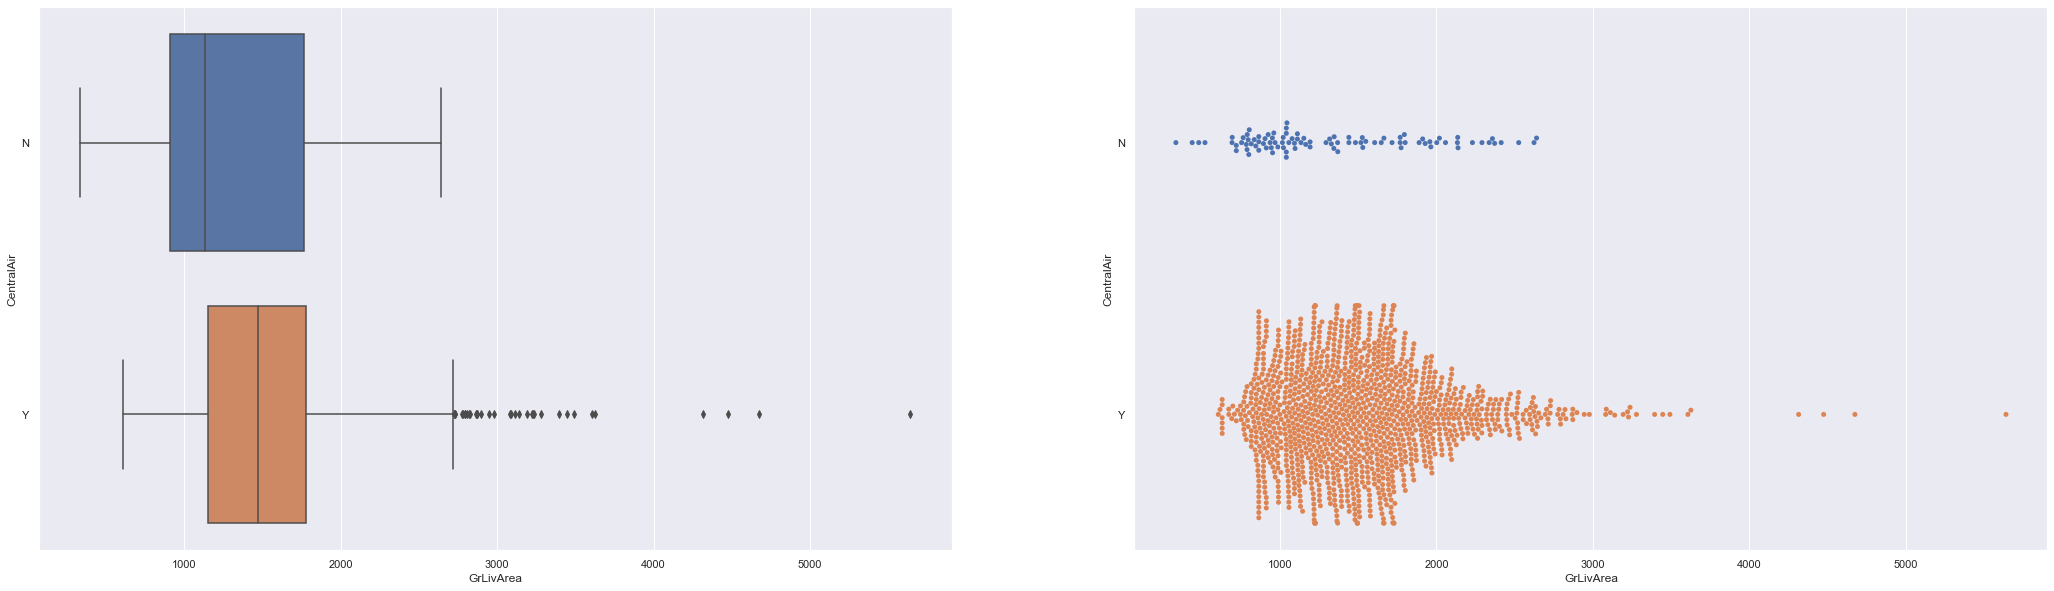

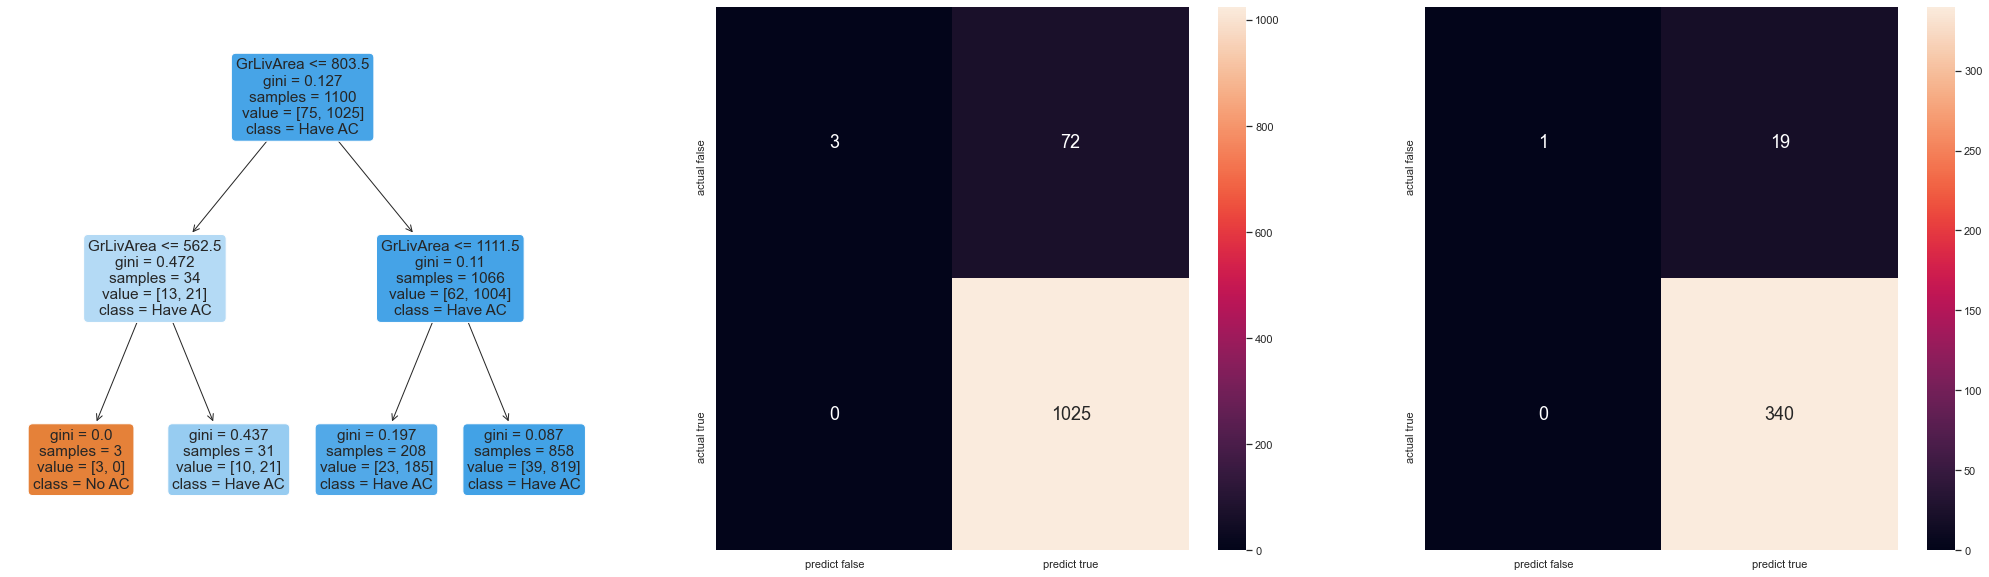

In [46]:
# Create a joint dataframe by concatenating GrLivArea and CentralAir
GLA_CA = pd.concat([GrLivArea, Central_Air], axis = 1).reindex(GrLivArea.index)

# Joint Boxplot & Swarmplot of GrLivArea against CentralAir
f, axes = plt.subplots(1, 2, figsize=(36, 10))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = GLA_CA, orient = "h", ax = axes[0])
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = GLA_CA, orient = "h", ax = axes[1])

# Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)
GLA_train, GLA_test, GLA_CA_train, GLA_CA_test = train_test_split(GrLivArea, Central_Air, test_size = 360)
# print('SP_train: ',GLA_train.shape,'\nSP_test: ',GLA_test.shape,'\nCA_train: ',GLA_CA_train.shape,'\nCA_test',GLA_CA_test.shape)

# Create a Decision Tree Classifier object
GLA_CA_dectree = DecisionTreeClassifier(max_depth = 2)
GLA_CA_dectree.fit(GLA_train, GLA_CA_train)                    # train the decision tree model

# Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
GLA_CA_train_pred = GLA_CA_dectree.predict(GLA_train)
# Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
GLA_CA_test_pred = GLA_CA_dectree.predict(GLA_test)

# Plotting the Two-Way Confusion Matrix (left is train set / right is test set)
f, axes = plt.subplots(1, 3, figsize=(36, 10))
plot_tree(GLA_CA_dectree, filled=True, rounded=True, feature_names=["GrLivArea"], class_names=["No AC","Have AC"], ax = axes[0]) # Visualize the Decision Tree model using the plot_tree function
sb.heatmap(confusion_matrix(GLA_CA_train, GLA_CA_train_pred), xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot = True, fmt=".0f", ax = axes[1], annot_kws={"size": 18})
sb.heatmap(confusion_matrix(GLA_CA_test, GLA_CA_test_pred), xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot = True, fmt=".0f", ax = axes[2], annot_kws={"size": 18})

In [47]:
# Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
# True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.
C = confusion_matrix(GLA_CA_train, GLA_CA_train_pred)
# C = [TN,FP
#     FN,TP]
# Print Classification Accuracy
print("For CentralAir against GrLivArea : train set")
print("Classification Accuracy \t:", GLA_CA_dectree.score(GLA_train, GLA_CA_train))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))
print()

C = confusion_matrix(GLA_CA_test, GLA_CA_test_pred)
# Print Classification Accuracy
print("For CentralAir against GrLivArea : test set")
print("Classification Accuracy \t:", GLA_CA_dectree.score(GLA_test, GLA_CA_test))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))

For CentralAir against GrLivArea : train set
Classification Accuracy 	: 0.9345454545454546
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.04
False Positive Rate (fpr) 	: 0.96
False Negative Rate (fnr) 	: 0.0

For CentralAir against GrLivArea : test set
Classification Accuracy 	: 0.9472222222222222
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.05
False Positive Rate (fpr) 	: 0.95
False Negative Rate (fnr) 	: 0.0


### Analysing CentralAir against **OverallQual**

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

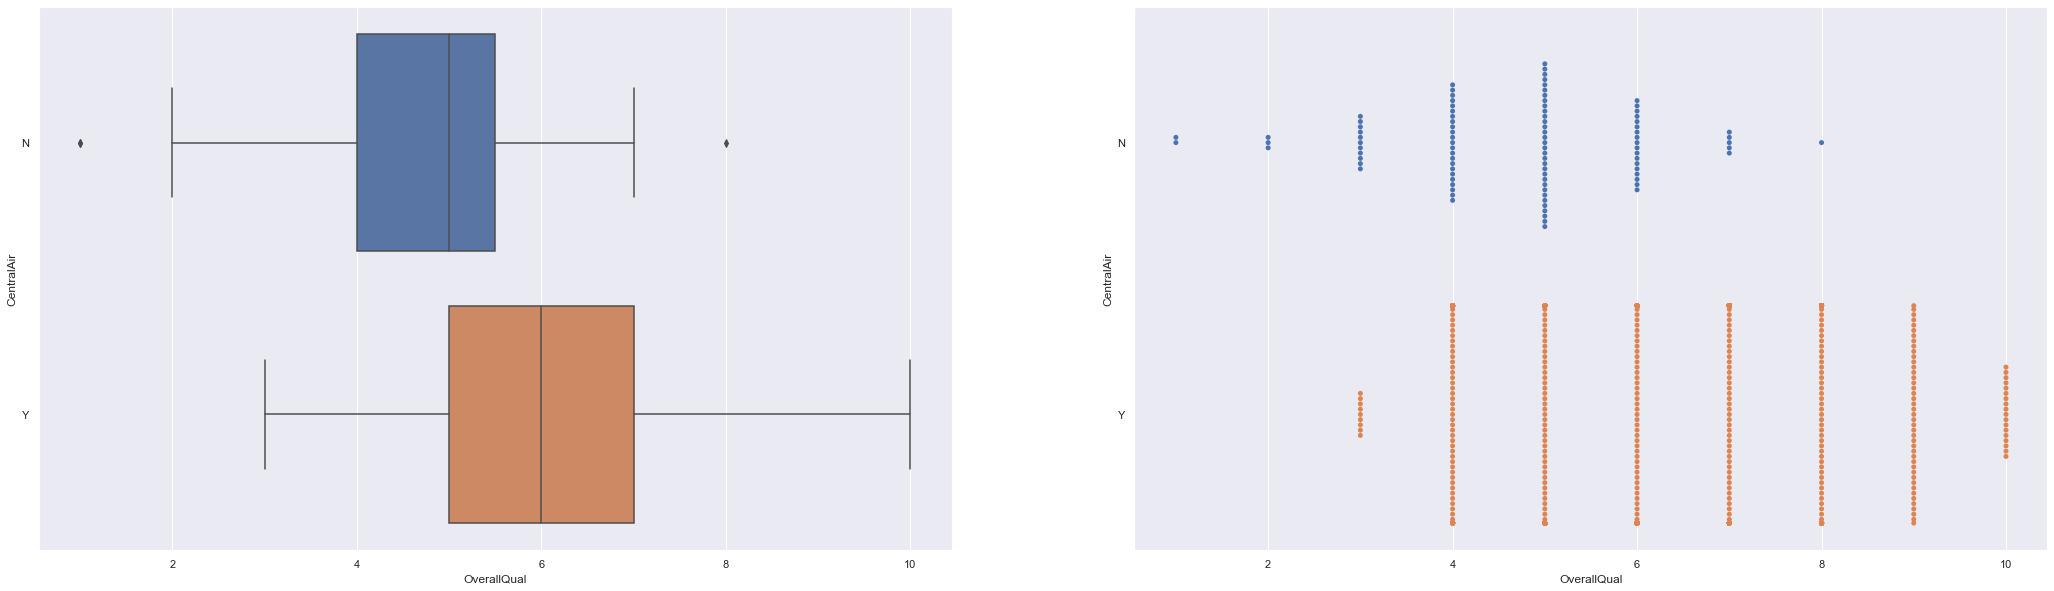

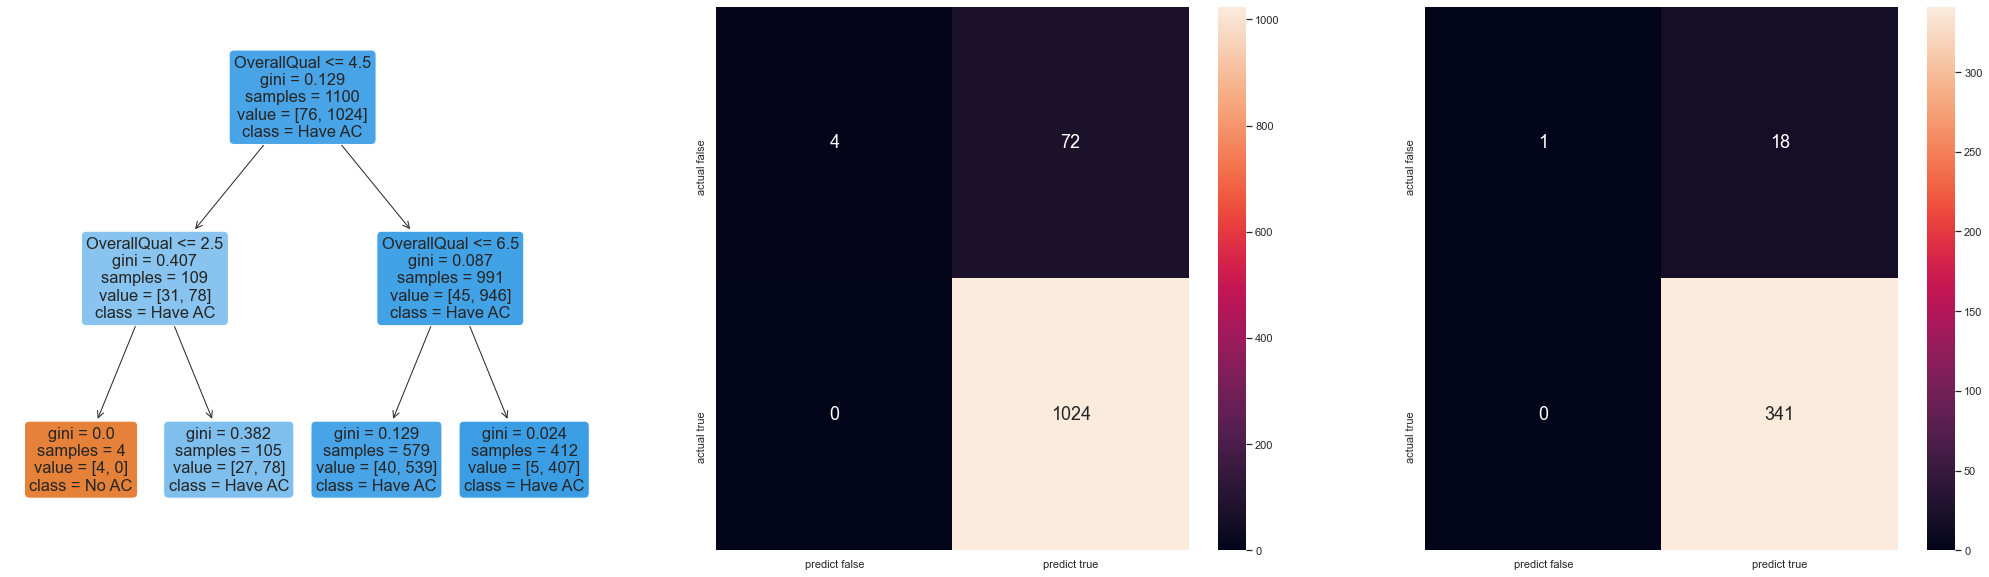

In [48]:
# Create a joint dataframe by concatenating OverallQual and CentralAir
OQ_CA = pd.concat([OverallQual, Central_Air], axis = 1).reindex(OverallQual.index)

# Joint Boxplot & Swarmplot of OverallQual against CentralAir
f, axes = plt.subplots(1, 2, figsize=(36, 10))
sb.boxplot(x = "OverallQual", y = "CentralAir", data = OQ_CA, orient = "h", ax = axes[0])
sb.swarmplot(x = "OverallQual", y = "CentralAir", data = OQ_CA, orient = "h", ax = axes[1])

# Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)
OQ_train, OQ_test, OQ_CA_train, OQ_CA_test = train_test_split(OverallQual, Central_Air, test_size = 360)

# Create a Decision Tree Classifier object
OQ_CA_dectree = DecisionTreeClassifier(max_depth = 2)
OQ_CA_dectree.fit(OQ_train, OQ_CA_train)                    # train the decision tree model

# Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
OQ_CA_train_pred = OQ_CA_dectree.predict(OQ_train)
# Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
OQ_CA_test_pred = OQ_CA_dectree.predict(OQ_test)

# Plotting the Two-Way Confusion Matrix (left is train set / right is test set)
f, axes = plt.subplots(1, 3, figsize=(36, 10))
plot_tree(OQ_CA_dectree, filled=True, rounded=True, feature_names=["OverallQual"], class_names=["No AC","Have AC"], ax = axes[0]) # Visualize the Decision Tree model using the plot_tree function
sb.heatmap(confusion_matrix(OQ_CA_train, OQ_CA_train_pred), xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot = True, fmt=".0f", ax = axes[1], annot_kws={"size": 18})
sb.heatmap(confusion_matrix(OQ_CA_test, OQ_CA_test_pred), xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot = True, fmt=".0f", ax = axes[2], annot_kws={"size": 18})

In [49]:
# Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
# True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.
C = confusion_matrix(OQ_CA_train, OQ_CA_train_pred)
# C = [TN,FP
#     FN,TP]
# Print Classification Accuracy
print("For CentralAir against OverallQual : train set")
print("Classification Accuracy \t:", OQ_CA_dectree.score(OQ_train, OQ_CA_train))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))
print()

C = confusion_matrix(OQ_CA_test, OQ_CA_test_pred)
# Print Classification Accuracy
print("For CentralAir against OverallQual : test set")
print("Classification Accuracy \t:", OQ_CA_dectree.score(OQ_test, OQ_CA_test))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))

For CentralAir against OverallQual : train set
Classification Accuracy 	: 0.9345454545454546
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.05263157894736842
False Positive Rate (fpr) 	: 0.9473684210526315
False Negative Rate (fnr) 	: 0.0

For CentralAir against OverallQual : test set
Classification Accuracy 	: 0.95
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.05263157894736842
False Positive Rate (fpr) 	: 0.9473684210526315
False Negative Rate (fnr) 	: 0.0


### Analysing CentralAir against **YearBuilt**

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

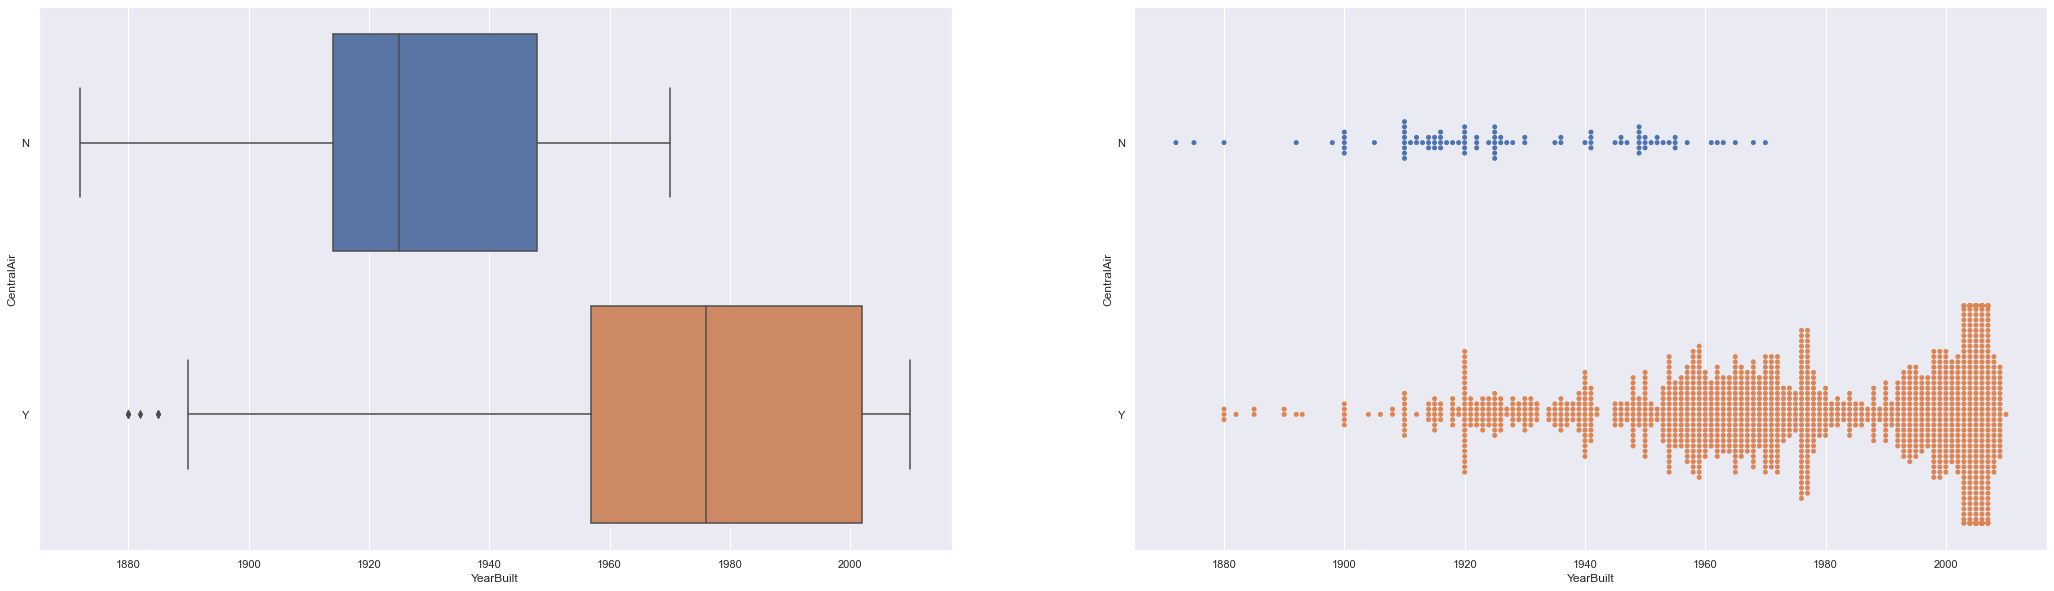

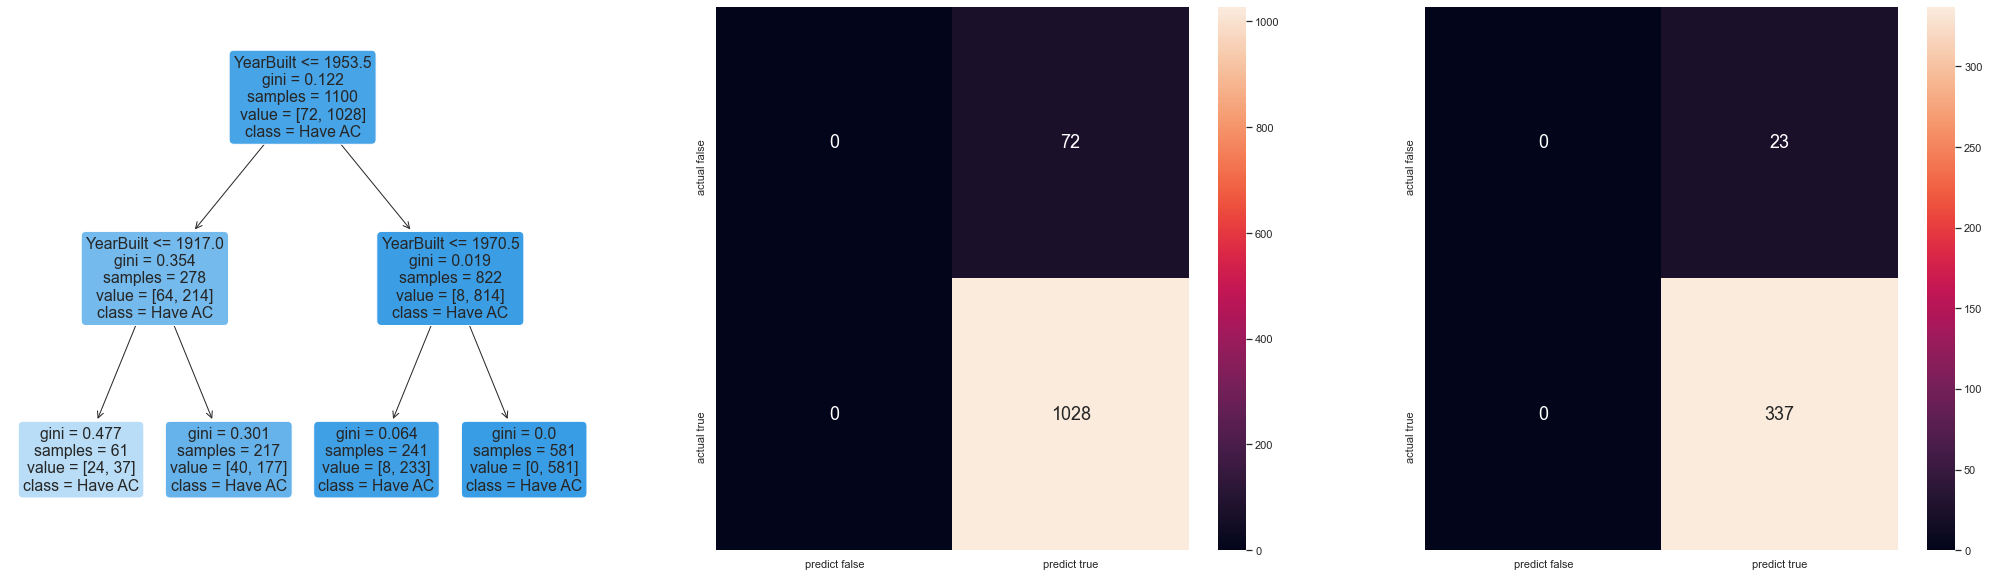

In [50]:
# Create a joint dataframe by concatenating YearBuilt and CentralAir
YB_CA = pd.concat([YearBuilt, Central_Air], axis = 1).reindex(YearBuilt.index)

# Joint Boxplot & Swarmplot of YearBuilt against CentralAir
f, axes = plt.subplots(1, 2, figsize=(36, 10))
sb.boxplot(x = "YearBuilt", y = "CentralAir", data = YB_CA, orient = "h", ax = axes[0])
sb.swarmplot(x = "YearBuilt", y = "CentralAir", data = YB_CA, orient = "h", ax = axes[1])

# Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)
YB_train, YB_test, YB_CA_train, YB_CA_test = train_test_split(YearBuilt, Central_Air, test_size = 360)

# Create a Decision Tree Classifier object
YB_CA_dectree = DecisionTreeClassifier(max_depth = 2)
YB_CA_dectree.fit(YB_train, YB_CA_train)                    # train the decision tree model

# Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
YB_CA_train_pred = YB_CA_dectree.predict(YB_train)
# Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix
YB_CA_test_pred = YB_CA_dectree.predict(YB_test)

# Plotting the Two-Way Confusion Matrix (left is train set / right is test set)
f, axes = plt.subplots(1, 3, figsize=(36, 10))
plot_tree(YB_CA_dectree, filled=True, rounded=True, feature_names=["YearBuilt"], class_names=["No AC","Have AC"], ax = axes[0]) # Visualize the Decision Tree model using the plot_tree function
sb.heatmap(confusion_matrix(YB_CA_train, YB_CA_train_pred), xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot = True, fmt=".0f", ax = axes[1], annot_kws={"size": 18})
sb.heatmap(confusion_matrix(YB_CA_test, YB_CA_test_pred), xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot = True, fmt=".0f", ax = axes[2], annot_kws={"size": 18})

In [51]:
# Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
# True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.
C = confusion_matrix(YB_CA_train, YB_CA_train_pred)
# C = [TN,FP
#     FN,TP]
# Print Classification Accuracy
print("For CentralAir against YearBuilt : train set")
print("Classification Accuracy \t:", YB_CA_dectree.score(YB_train, YB_CA_train))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))
print()

C = confusion_matrix(YB_CA_test, YB_CA_test_pred)
# Print Classification Accuracy
print("For CentralAir against YearBuilt : test set")
print("Classification Accuracy \t:", YB_CA_dectree.score(YB_test, YB_CA_test))
# Print True Positive Rate
print('True Positive Rate (tpr) \t:',C[1,1]/(C[1,1]+C[1,0]))
# Print True Negative Rate
print('True Negative Rate (tnr) \t:',C[0,0]/(C[0,0]+C[0,1]))
# Print False Positive Rate
print('False Positive Rate (fpr) \t:',C[0,1]/(C[0,1]+C[0,0]))
# Print False Negative Rate
print('False Negative Rate (fnr) \t:',C[1,0]/(C[1,0]+C[1,1]))

For CentralAir against YearBuilt : train set
Classification Accuracy 	: 0.9345454545454546
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0

For CentralAir against YearBuilt : test set
Classification Accuracy 	: 0.9361111111111111
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0


# Problem 3 : Best Uni-Variate Model to Predict CentralAir
Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on
both Train and Test Data to comment on which univariate classification tree you think is the best to predict “CentralAir”.

#### run 1 :
**SalePrice**
* train set
Classification Accuracy 	: 0.9336363636363636
True Positive Rate (tpr) 	: 0.9990186457311089
True Negative Rate (tnr) 	: 0.1111111111111111
False Positive Rate (fpr) 	: 0.8888888888888888
False Negative Rate (fnr) 	: 0.0009813542688910696
* test set
Classification Accuracy 	: 0.9694444444444444
True Positive Rate (tpr) 	: 0.9971098265895953
True Negative Rate (tnr) 	: 0.2857142857142857
False Positive Rate (fpr) 	: 0.7142857142857143
False Negative Rate (fnr) 	: 0.002890173410404624

**GrLivArea**
* train set
Classification Accuracy 	: 0.9354545454545454
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.05333333333333334
False Positive Rate (fpr) 	: 0.9466666666666667
False Negative Rate (fnr) 	: 0.0
* test set
Classification Accuracy 	: 0.9444444444444444
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0

**OverallQual**
* train set
Classification Accuracy 	: 0.9472727272727273
True Positive Rate (tpr) 	: 0.9951737451737451
True Negative Rate (tnr) 	: 0.171875
False Positive Rate (fpr) 	: 0.828125
False Negative Rate (fnr) 	: 0.004826254826254826
* test set
Classification Accuracy 	: 0.9166666666666666
True Positive Rate (tpr) 	: 0.9878419452887538
True Negative Rate (tnr) 	: 0.16129032258064516
False Positive Rate (fpr) 	: 0.8387096774193549
False Negative Rate (fnr) 	: 0.0121580547112462

**YearBuilt**
* train set
Classification Accuracy 	: 0.9327272727272727
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0
* test set
Classification Accuracy 	: 0.9416666666666667
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0


#### run 2 :
**SalePrice**
* train set
Classification Accuracy 	: 0.9445454545454546
True Positive Rate (tpr) 	: 0.9990300678952473
True Negative Rate (tnr) 	: 0.13043478260869565
False Positive Rate (fpr) 	: 0.8695652173913043
False Negative Rate (fnr) 	: 0.0009699321047526673
* test set
Classification Accuracy 	: 0.9361111111111111
True Positive Rate (tpr) 	: 0.9970059880239521
True Negative Rate (tnr) 	: 0.15384615384615385
False Positive Rate (fpr) 	: 0.8461538461538461
False Negative Rate (fnr) 	: 0.0029940119760479044

**GrLivArea**
* train set
Classification Accuracy 	: 0.9363636363636364
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.05405405405405406
False Positive Rate (fpr) 	: 0.9459459459459459
False Negative Rate (fnr) 	: 0.0
* test set
Classification Accuracy 	: 0.9416666666666667
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0

**OverallQual**
* train set
Classification Accuracy 	: 0.9381818181818182
True Positive Rate (tpr) 	: 0.9912451361867705
True Negative Rate (tnr) 	: 0.18055555555555555
False Positive Rate (fpr) 	: 0.8194444444444444
False Negative Rate (fnr) 	: 0.008754863813229572
* test set
Classification Accuracy 	: 0.9444444444444444
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.13043478260869565
False Positive Rate (fpr) 	: 0.8695652173913043
False Negative Rate (fnr) 	: 0.0

**YearBuilt**
* train set
Classification Accuracy 	: 0.9363636363636364
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.027777777777777776
False Positive Rate (fpr) 	: 0.9722222222222222
False Negative Rate (fnr) 	: 0.0
* test set
Classification Accuracy 	: 0.9361111111111111
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0

#### run 3 :
**SalePrice**
* train set
Classification Accuracy 	: 0.9390909090909091
True Positive Rate (tpr) 	: 0.9931972789115646
True Negative Rate (tnr) 	: 0.15492957746478872
False Positive Rate (fpr) 	: 0.8450704225352113
False Negative Rate (fnr) 	: 0.006802721088435374
* test set
Classification Accuracy 	: 0.95
True Positive Rate (tpr) 	: 0.9880952380952381
True Negative Rate (tnr) 	: 0.4166666666666667
False Positive Rate (fpr) 	: 0.5833333333333334
False Negative Rate (fnr) 	: 0.011904761904761904

**GrLivArea**
* train set
Classification Accuracy 	: 0.94
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.029411764705882353
False Positive Rate (fpr) 	: 0.9705882352941176
False Negative Rate (fnr) 	: 0.0
* test set
Classification Accuracy 	: 0.9305555555555556
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.07407407407407407
False Positive Rate (fpr) 	: 0.9259259259259259
False Negative Rate (fnr) 	: 0.0

**OverallQual**
* train set
Classification Accuracy 	: 0.9436363636363636
True Positive Rate (tpr) 	: 0.9961127308066083
True Negative Rate (tnr) 	: 0.18309859154929578
False Positive Rate (fpr) 	: 0.8169014084507042
False Negative Rate (fnr) 	: 0.003887269193391642
* test set
Classification Accuracy 	: 0.9277777777777778
True Positive Rate (tpr) 	: 0.9851190476190477
True Negative Rate (tnr) 	: 0.125
False Positive Rate (fpr) 	: 0.875
False Negative Rate (fnr) 	: 0.01488095238095238

**YearBuilt**
* train set
Classification Accuracy 	: 0.9381818181818182
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0
* test set
Classification Accuracy 	: 0.925
True Positive Rate (tpr) 	: 1.0
True Negative Rate (tnr) 	: 0.0
False Positive Rate (fpr) 	: 1.0
False Negative Rate (fnr) 	: 0.0

In [52]:
class store_stats:
    def __init__(self,train_acc,train_tpr,train_fpr,test_acc,test_tpr,test_fpr):
        self.train_acc = train_acc
        self.train_tpr = train_tpr
        self.train_fpr = train_fpr
        self.test_acc = test_acc
        self.test_tpr = test_tpr
        self.test_fpr = test_fpr

SP = store_stats((0.9336363636363636+0.9445454545454546+0.9390909090909091)/3,(0.9990186457311089+0.9990300678952473+0.9931972789115646)/3,(0.8888888888888888+0.8695652173913043+0.8450704225352113)/3,(0.9694444444444444+0.9361111111111111+0.95)/3,(0.9971098265895953+0.9970059880239521+0.9880952380952381)/3,(0.7142857142857143+0.8461538461538461+0.5833333333333334)/3)
GLA = store_stats((0.9354545454545454+0.9363636363636364+0.94)/3,(1.0+1.0+1.0)/3,(0.9466666666666667+0.9459459459459459+0.9705882352941176)/3,(0.9444444444444444+0.9416666666666667+0.9305555555555556)/3,(1.0+1.0+1.0)/3,(1.0+1.0+0.9259259259259259)/3)
OQ = store_stats((0.9472727272727273+0.9381818181818182+0.9436363636363636)/3,(0.9951737451737451+0.9912451361867705+0.9961127308066083)/3,(0.828125+0.8194444444444444+0.8169014084507042)/3,(0.9166666666666666+0.9444444444444444+0.9277777777777778)/3,(0.9878419452887538+1.0+0.9851190476190477)/3,(0.8387096774193549+0.8695652173913043+0.875)/3)
YB = store_stats((0.9327272727272727+0.9363636363636364+0.9381818181818182)/3,(1.0+1.0+1.0)/3,(1.0+0.9722222222222222+1.0)/3,(0.9416666666666667+0.9361111111111111+0.925)/3,(1.0+1.0+1.0)/3,(1.0+1.0+1.0)/3)

In [53]:
print("Comparing Train Classification Accuracy : ")
print("SP \t: ",SP.train_acc)
print("GLA \t: ",GLA.train_acc)
print("OQ \t: ", OQ.train_acc)
print("YB \t: ", YB.train_acc)
print()
print("Comparing Test Classification Accuracy : ")
print("SP \t: ",SP.test_acc)
print("GLA \t: ",GLA.test_acc)
print("OQ \t: ", OQ.test_acc)
print("YB \t: ", YB.test_acc)
print()
print("Comparing Train True Positive Rate : ")
print("SP \t: ",SP.train_tpr)
print("GLA \t: ",GLA.train_tpr)
print("OQ \t: ", OQ.train_tpr)
print("YB \t: ", YB.train_tpr)
print()
print("Comparing Test True Positive Rate : ")
print("SP \t: ",SP.test_tpr)
print("GLA \t: ",GLA.test_tpr)
print("OQ \t: ", OQ.test_tpr)
print("YB \t: ", YB.test_tpr)
print()
print("Comparing Train False Positive Rate : ")
print("SP \t: ",SP.train_fpr)
print("GLA \t: ",GLA.train_fpr)
print("OQ \t: ", OQ.train_fpr)
print("YB \t: ", YB.train_fpr)
print()
print("Comparing Test False Positive Rate : ")
print("SP \t: ",SP.test_fpr)
print("GLA \t: ",GLA.test_fpr)
print("OQ \t: ", OQ.test_fpr)
print("YB \t: ", YB.test_fpr)
print()

Comparing Train Classification Accuracy : 
SP 	:  0.9390909090909091
GLA 	:  0.9372727272727271
OQ 	:  0.943030303030303
YB 	:  0.9357575757575759

Comparing Test Classification Accuracy : 
SP 	:  0.9518518518518517
GLA 	:  0.9388888888888888
OQ 	:  0.9296296296296296
YB 	:  0.9342592592592593

Comparing Train True Positive Rate : 
SP 	:  0.9970819975126402
GLA 	:  1.0
OQ 	:  0.994177204055708
YB 	:  1.0

Comparing Test True Positive Rate : 
SP 	:  0.9940703509029286
GLA 	:  1.0
OQ 	:  0.9909869976359339
YB 	:  1.0

Comparing Train False Positive Rate : 
SP 	:  0.8678415096051347
GLA 	:  0.9544002826355767
OQ 	:  0.8214902842983829
YB 	:  0.9907407407407408

Comparing Test False Positive Rate : 
SP 	:  0.7145909645909646
GLA 	:  0.9753086419753086
OQ 	:  0.8610916316035531
YB 	:  1.0



* for all models, both train and test, the Classification Accuracy are decently good with a range of 93-95%
* for all models, both train and test, the True Positive Rate are extremely high with a range of 99-100%

**However, the False Positive Rate is where most models fall short, mostly due to the high ratio of 14:1 where housing is 14 times more likely to have air-conditioning**
* For both GrLivArea and YearBuilt models, both train and test, the False Positive Rate is close to 100%
* Both SalePrice and OverallQual models fare slightly better with False Positive Rate of range 70-86%
* Therefore, it is a toss-up between SalePrice and OverallQual being the Best Univariant Classification to predict CentralAir